# 0. Data Load

In [231]:
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd

yf.pdr_override()
data = pdr.get_data_yahoo("005930.KS")

[*********************100%***********************]  1 of 1 completed


# 1. EDA(DDA + EDA + CDA)

In [232]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-04,68800.0,69100.0,68200.0,68300.0,68300.0,12360193
2023-08-07,67700.0,69200.0,67600.0,68500.0,68500.0,10968505
2023-08-08,69000.0,69100.0,67400.0,67600.0,67600.0,14664709
2023-08-09,68000.0,69600.0,67900.0,68900.0,68900.0,17259673
2023-08-10,68300.0,68500.0,67800.0,68000.0,68000.0,10169368


In [3]:
import re

dataTemp = data.reset_index()
dataTemp['Year'] = dataTemp['Date'].apply(lambda x: int(str(x)[:4]))
dataTemp['Month'] = dataTemp['Date'].apply(lambda x: int(str(x)[5:7]))
dataTemp['Day'] = dataTemp['Date'].apply(lambda x: int(str(x)[8:10]))
dataTemp = dataTemp[['Year', 'Month', 'Day', 'Adj Close', 'Volume', 'Open',	'High',	'Low','Close']]
dataTemp.head()

,Year,Month,Day,Adj Close,Volume,Open,High,Low,Close
0,2000,1,4,4514.581543,74195000,6000.0,6110.0,5660.0,6110.0
1,2000,1,5,4122.973145,74680000,5800.0,6060.0,5520.0,5580.0
2,2000,1,6,4152.527832,54390000,5750.0,5780.0,5580.0,5620.0
3,2000,1,7,4093.416016,40305000,5560.0,5670.0,5360.0,5540.0
4,2000,1,10,4263.359863,46880000,5600.0,5770.0,5580.0,5770.0


In [4]:
dataTemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5924 entries, 0 to 5923
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       5924 non-null   int64  
 1   Month      5924 non-null   int64  
 2   Day        5924 non-null   int64  
 3   Adj Close  5924 non-null   float64
 4   Volume     5924 non-null   int64  
 5   Open       5924 non-null   float64
 6   High       5924 non-null   float64
 7   Low        5924 non-null   float64
 8   Close      5924 non-null   float64
dtypes: float64(5), int64(4)
memory usage: 416.7 KB


In [5]:
dataTemp.describe()

,Year,Month,Day,Adj Close,Volume,Open,High,Low,Close
count,5924.000000,5924.000000,5924.000000,5924.000000,5.924000e+03,5924.000000,5924.000000,5924.000000,5924.000000
mean,2011.170324,6.463707,15.845712,23168.609001,2.131853e+07,26815.960500,27079.264011,26543.857191,26808.517893
std,6.841555,3.430977,8.719550,20735.682131,1.523117e+07,21311.617871,21479.878950,21129.479080,21293.566862
min,2000.000000,1.000000,1.000000,2017.152954,0.000000e+00,2540.000000,2760.000000,2420.000000,2730.000000
25%,2005.000000,3.000000,8.000000,7846.949707,1.168830e+07,10440.000000,10620.000000,10320.000000,10500.000000
50%,2011.000000,6.000000,16.000000,14416.013184,1.725765e+07,18420.000000,18650.000000,18270.000000,18460.000000
75%,2017.000000,9.000000,23.000000,37636.417969,2.648136e+07,42825.000000,43412.500000,42400.000000,42825.000000
max,2023.000000,12.000000,31.000000,86286.710938,1.642150e+08,90300.000000,96800.000000,89500.000000,91000.000000


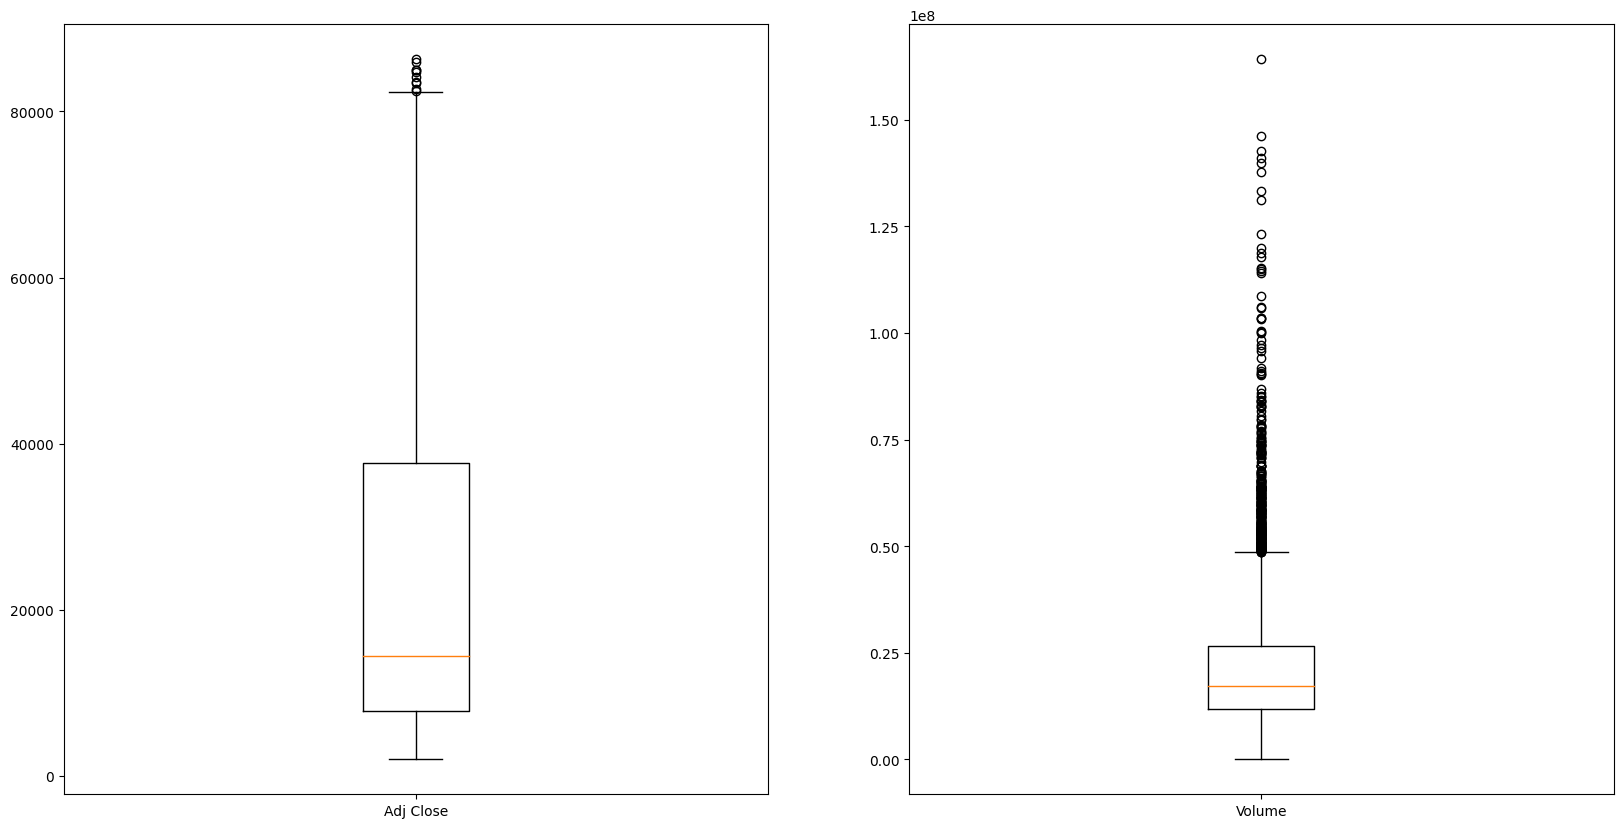

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize = (20, 10))

ax[0].boxplot(dataTemp['Adj Close'])
ax[0].set_xticklabels(['Adj Close'])
ax[1].boxplot(dataTemp['Volume'])
ax[1].set_xticklabels(['Volume'])
plt.show()

In [7]:
import plotly.offline as plyo
import cufflinks as cf

plyo.iplot(
    dataTemp[['Adj Close', 'Volume']].iplot(
            kind='hist',
            subplots=True,
            # bins=15,
            asFigure=True
            ),
    filename='./ply_03'
)

In [227]:
import numpy as np

plyo.iplot(
    dataTemp[['Adj Close', 'Volume']].apply(np.log).iplot(
            kind='hist',
            subplots=True,
            # bins=15,
            asFigure=True
            ),
    filename='./ply_03'
)

In [10]:
data_close = dataTemp.groupby(['Year', 'Month'])['Adj Close'].sum().reset_index()
data_close['Year_Month'] = data_close['Year'].astype(str) + '-' + data_close['Month'].astype(str)
data_close['Year_Month'] = pd.to_datetime(data_close['Year_Month'])
# test['Year']
data_close = data_close.set_index('Year_Month')
data_close = data_close['Adj Close']
data_close = data_close.iloc[:-1]
data_close = data_close.apply(np.log)
data_close.head()

Year_Month
2000-01-01    11.352418
2000-02-01    11.306348
2000-03-01    11.532322
2000-04-01    11.450351
2000-05-01    11.579043
Name: Adj Close, dtype: float64

In [11]:
data_volume = dataTemp.groupby(['Year', 'Month'])['Volume'].sum().reset_index()
data_volume['Year_Month'] = data_volume['Year'].astype(str) + '-' + data_volume['Month'].astype(str)
data_volume['Year_Month'] = pd.to_datetime(data_volume['Year_Month'])
# test['Year']
data_volume = data_volume.set_index('Year_Month')
data_volume = data_volume['Volume']
data_volume = data_volume.iloc[:-1]
data_volume = data_volume.apply(np.log)
data_volume.idxmin()
data_volume.loc['2023-02-01 00:00:00']
data_volume.loc['2023-03-01 00:00:00']

19.427339097653487

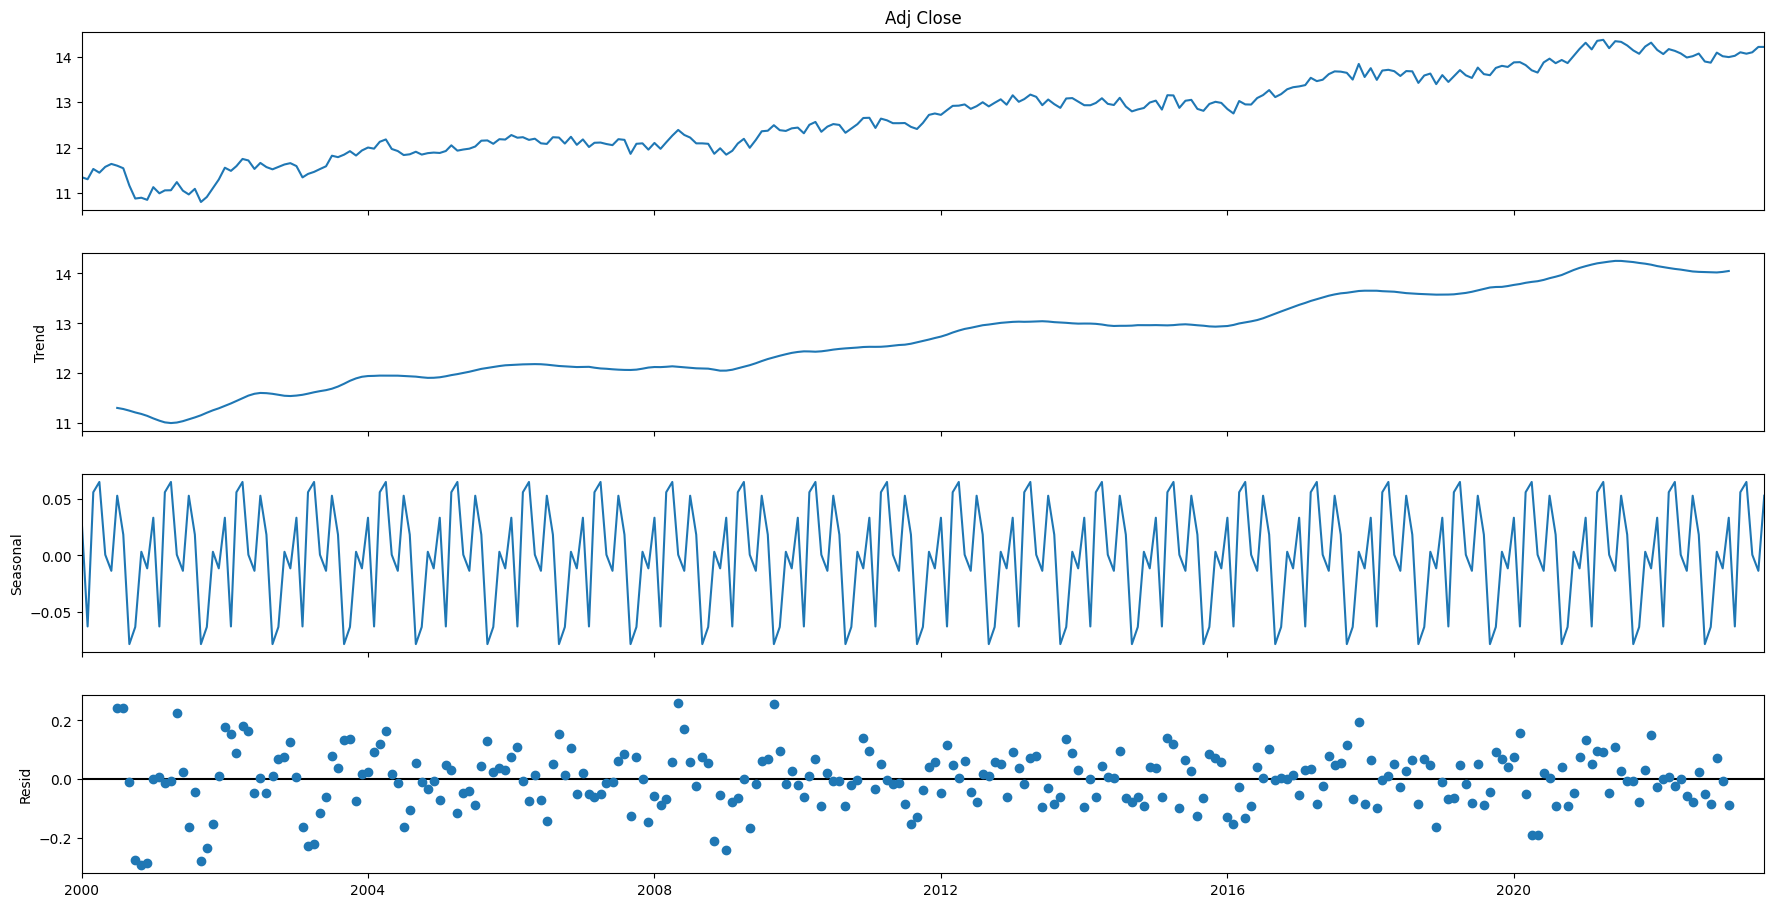

In [12]:
import statsmodels.api as sm

decompostion = sm.tsa.seasonal_decompose(data_close, model = 'addictive', period = 12)
fig = decompostion.plot()
fig.set_size_inches(20, 10)
plt.show()

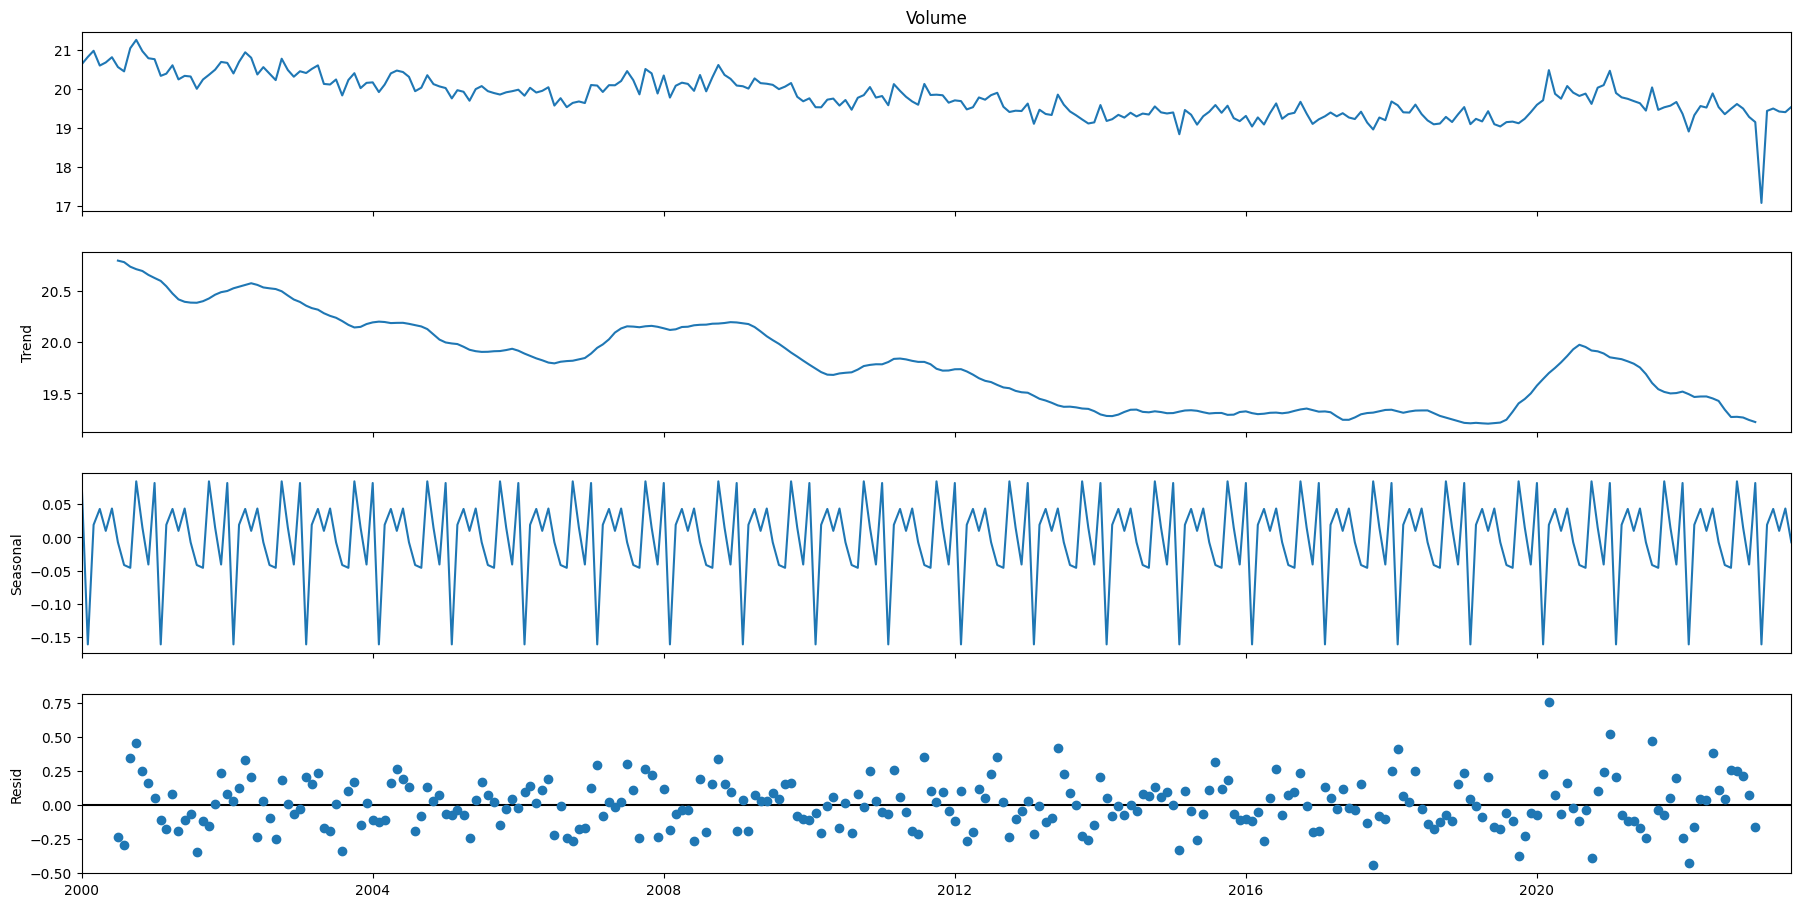

In [13]:
import statsmodels.api as sm

decompostion = sm.tsa.seasonal_decompose(data_volume, model = 'addictive', period = 12)
fig = decompostion.plot()
fig.set_size_inches(20, 10)
plt.show()

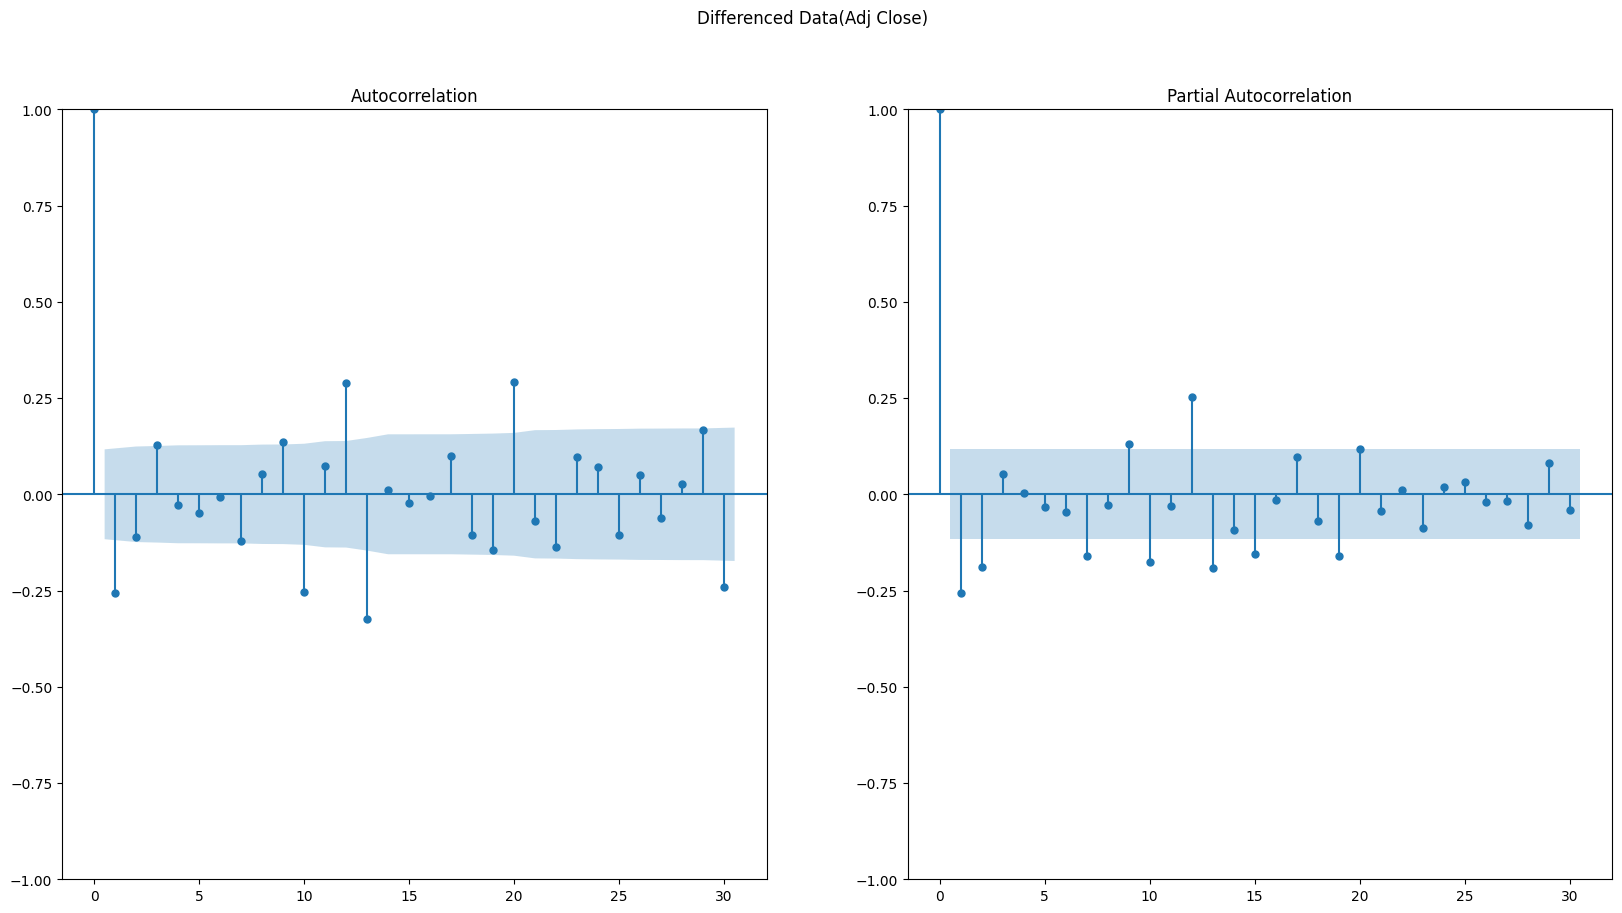

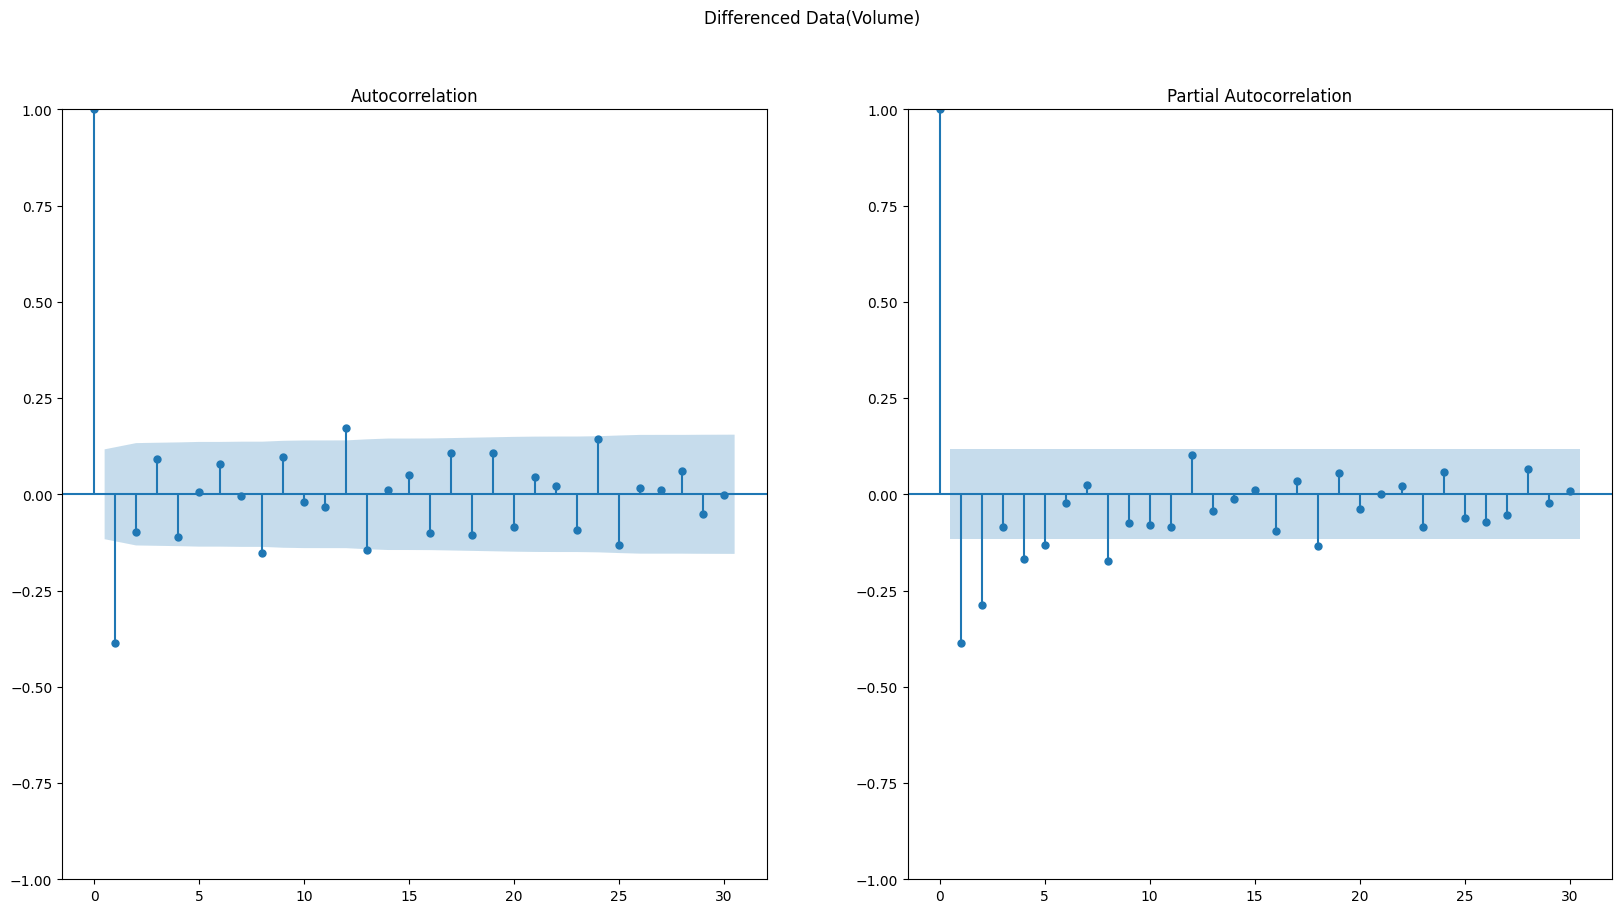

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
fig.suptitle('Differenced Data(Adj Close)')
sm.graphics.tsa.plot_acf(data_close.diff(1).dropna().values.squeeze(), lags=30 , ax = ax[0])
sm.graphics.tsa.plot_pacf(data_close.diff(1).dropna().values.squeeze(), lags=30, ax = ax[1])
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(20,10))
fig.suptitle('Differenced Data(Volume)')
sm.graphics.tsa.plot_acf(data_volume.diff(1).dropna().values.squeeze(), lags=30 , ax = ax[0])
sm.graphics.tsa.plot_pacf(data_volume.diff(1).dropna().values.squeeze(), lags=30, ax = ax[1])
plt.show()

# 3. Modeling & Visualization

In [71]:
from sklearn.model_selection import train_test_split

train_close_data, test_close_data = train_test_split(data_close, test_size = 0.2, shuffle = False)
train_volume_data, test_volume_data = train_test_split(data_volume, test_size = 0.2, shuffle = False)

In [214]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

class Arima_process:
    def __init__(self, order, seasonal_order, bmulti = False):
        if bmulti:
            df = pd.DataFrame(train_close_data.shift(2))
            df['Volume'] = train_volume_data
            df = df.fillna(method='bfill')
            
            model = SARIMAX(endog=train_close_data.values, exog=df, order=order, seasonal_order=seasonal_order)
            self.sarima_model = model.fit()
            self.prediction = sarima_model.get_forecast(len(test_close_data), exog=[test_close_data.shift(1), test_volume_data])
        else:
            model = SARIMAX(train_close_data.values, order = order, seasonal_order = seasonal_order)
            self.sarima_model = model.fit()
            self.prediction = sarima_model.get_forecast(len(test_close_data))
        self.predicted_value = prediction.predicted_mean
        self.predicted_ub = prediction.conf_int()[:,0]
        self.predicted_lb = prediction.conf_int()[:,1]
        self.predict_index = list(test_close_data.index)
        self.r2 = r2_score(test_close_data, predicted_value)
    def drawpredictgraph(self, ax, color = 'Orange'):
        ax.vlines(predict_index[0], data_close.min(), data_close.max(), linestyle='--', color='r')
        ax.plot(predict_index, predicted_value, color = color)
        ax.fill_between(predict_index, predicted_lb, predicted_ub, color='k', alpha = 0.1)
    def drawgraph(self, ax, predictcolor = 'Orange'):
        self.drawpredictgraph(ax, predictcolor)
        data_close.plot(ax = ax)

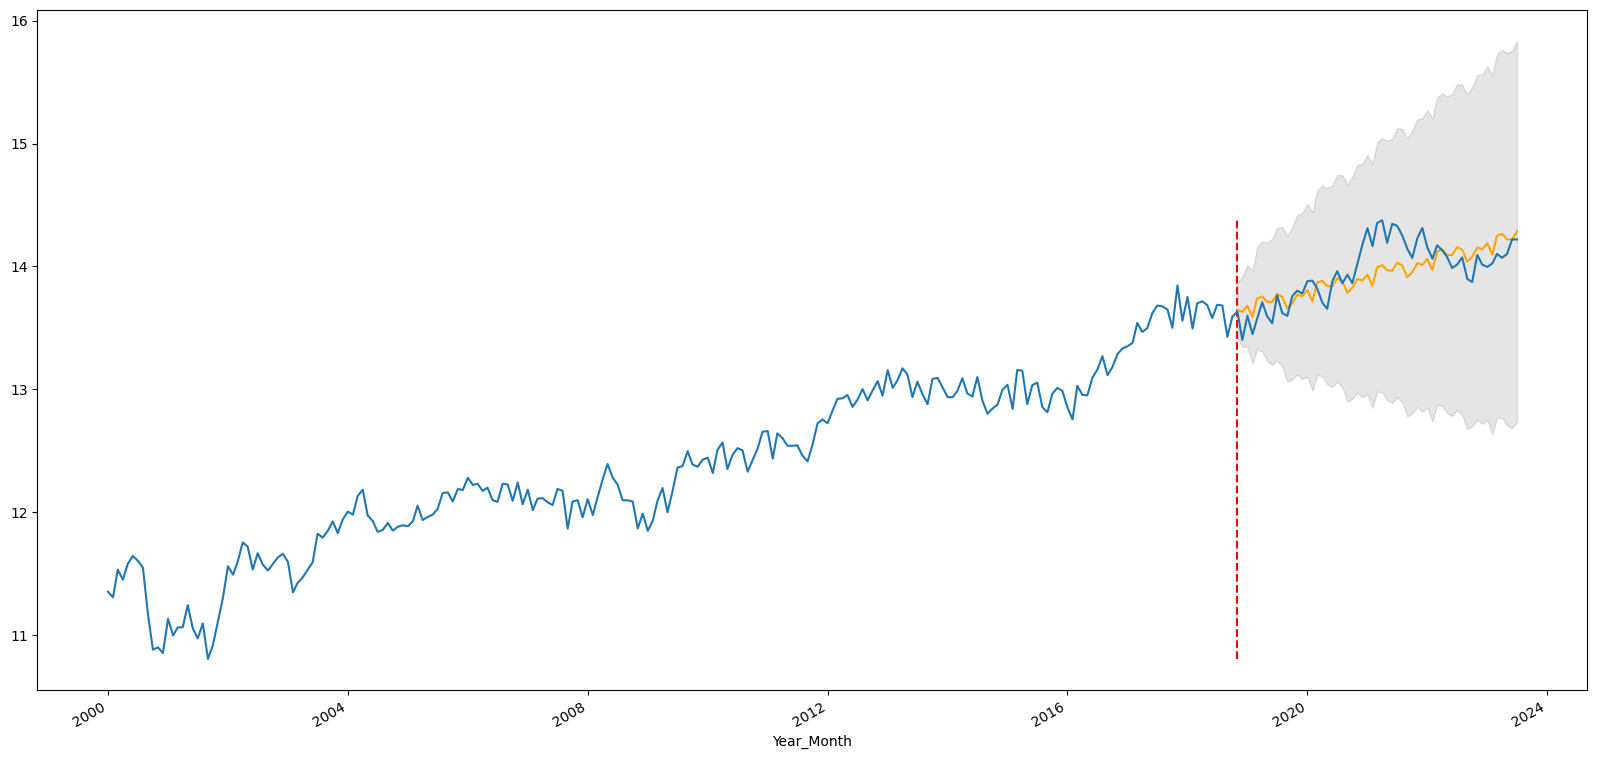

r2 score : 0.5117940952860904


In [224]:
fig, ax = plt.subplots(figsize=(20, 10))

singlearima_process = Arima_process((0, 1, 1), (0, 1, 1, 12))

singlearima_process.drawgraph(ax)
plt.show()
print('r2 score :', singlearima_process.r2)

In [215]:
singlearima_process.sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  226
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 148.902
Date:                            Thu, 10 Aug 2023   AIC                           -291.805
Time:                                    16:47:41   BIC                           -281.721
Sample:                                         0   HQIC                          -287.730
                                            - 226                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2261      0.064     -3.538      0.000      -0.351      -0.101
ma.S.L12      -0.9156      0.084    -10.914      0.000      -1.080      -0.751
sigma2         0.0131      0.001      9.095      0.000       0.010       0.016
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.37
Prob(Q):                              0.97   Prob(JB):                         0.83
Heteroskedasticity (H):               0.72   Skew:                            -0.07
Prob(H) (two-sided):                  0.16   Kurtosis:                         2.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
qf = cf.QuantFig(
    data[['Open', 'High', 'Low', 'Close']],
    title = 'Samsung Junja Rate',
    up_color = 'red',
    down_color = 'blue',
    name = 'Samsung Junja'
)

In [66]:
import plotly.graph_objs as go

fig = qf.iplot(asFigure=True)
vertical_line = go.layout.Shape(
    type="line",
    x0=predict_index[0],
    x1=predict_index[0],
    y0=data['Low'].min(),
    y1=data['High'].max(),
    line=dict(color="green", dash="dash")
)
trend_line = go.layout.Shape(
    type="line",
    x0=predict_index[0],
    x1=predict_index[-1],
    y0=np.exp(predicted_value[0])/22,
    y1=np.exp(predicted_value[-1])/22,
    line=dict(color="orange"),
)
fig.add_shape(vertical_line)
fig.add_shape(trend_line)
plyo.iplot(fig)

In [70]:
import plotly.graph_objects as go
import pandas as pd

# 데이터 불러오기
# Figure 생성
fig = go.Figure()
trace = go.Scatter(x=predict_index, y= np.exp(predicted_value)/22, mode='lines', line=dict(color="yellow") ,name='Predict Value')

vertical_line = go.layout.Shape(
    type="line",
    x0=predict_index[0],
    x1=predict_index[0],
    y0=data['Low'].min(),
    y1=data['High'].max(),
    line=dict(color="green", dash="dash")
)
fig.update_layout(template='plotly_dark')
fig.add_shape(vertical_line)
fig.add_trace(go.Candlestick(x=data.index,open=data['Open'],high=data['High'],low=data['Low'],close=data['Close'], name = 'sam'))
fig.update_traces(increasing_line_color= 'blue', decreasing_line_color= 'red')
fig.add_trace(trace)
fig.show(asFigure=True)

c:\Users\chlgu\anaconda3\envs\plotly\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

c:\Users\chlgu\anaconda3\envs\plotly\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



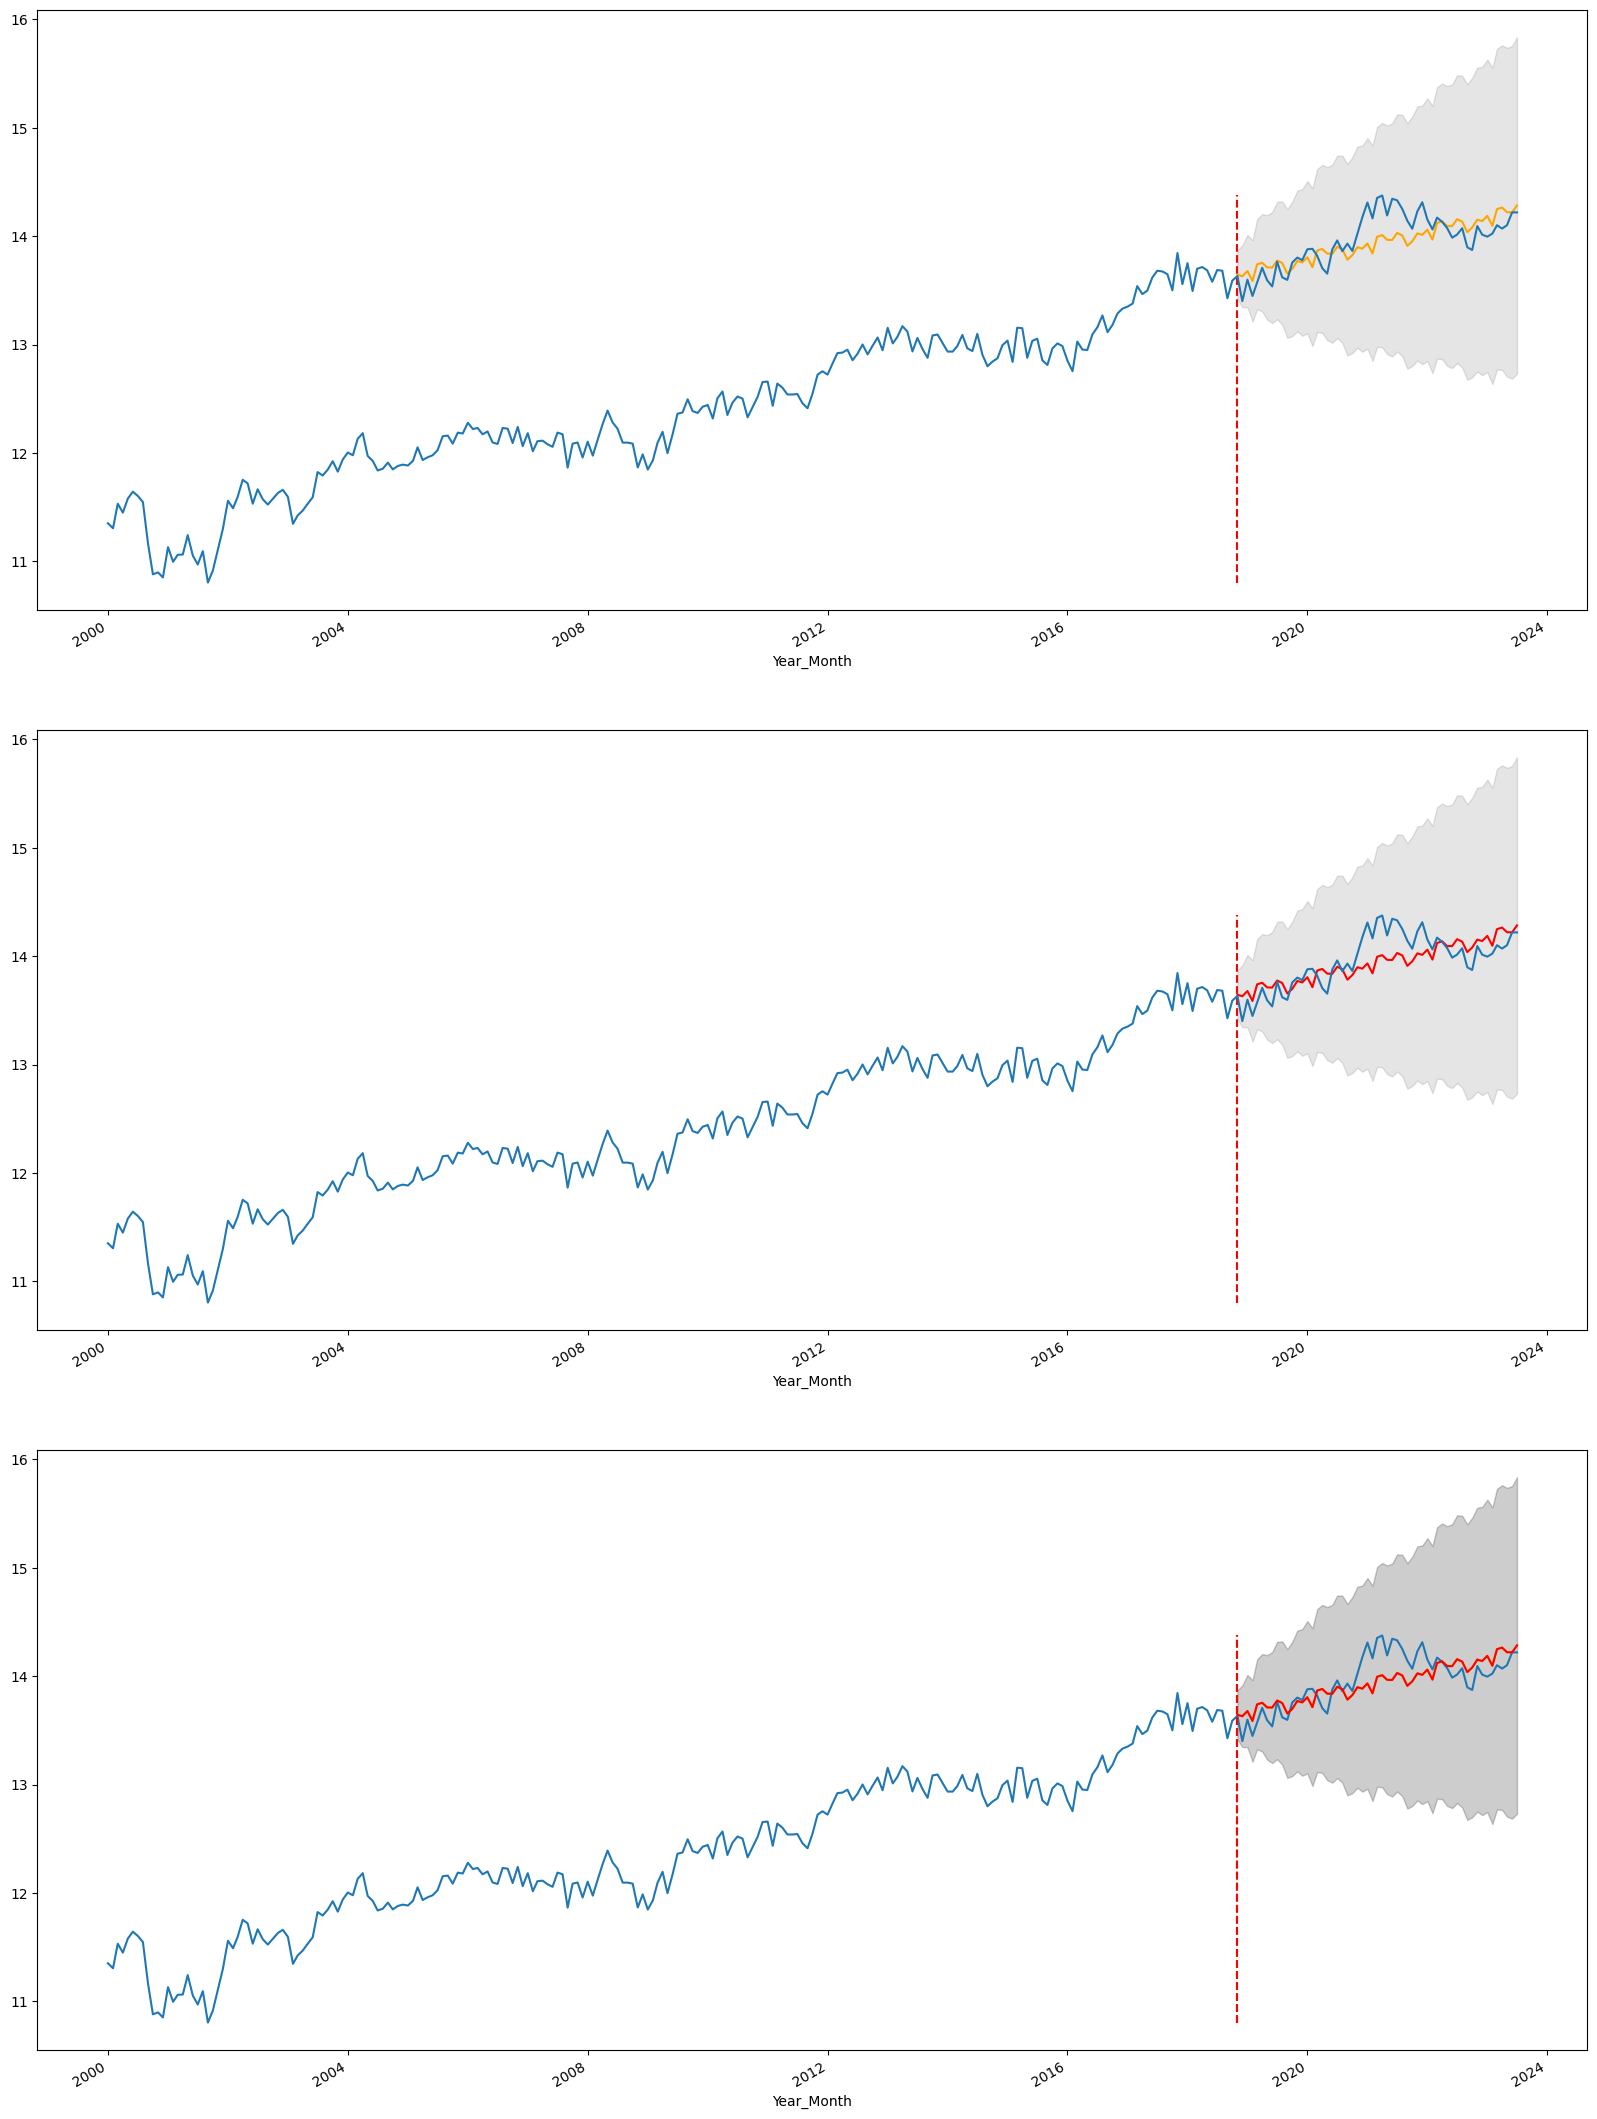

0.5117940952860904 0.5117940952860904


In [220]:
fig, ax = plt.subplots(3, 1, figsize=(20, 30))

singlearima_process = Arima_process((0, 1, 1), (0, 1, 1, 12))
multiarima_process = Arima_process((0, 1, 1), (0, 1, 1, 12), bmulti = True)

singlearima_process.drawgraph(ax[0])
singlearima_process.drawgraph(ax[2])
multiarima_process.drawgraph(ax[1], 'red')
multiarima_process.drawpredictgraph(ax[2], 'red')
# Arima_process(bmulti = True).drawpredictgraph(ax)
plt.show()
print(singlearima_process.r2, multiarima_process.r2)

In [225]:
singlearima_process.sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  226
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 148.902
Date:                            Thu, 10 Aug 2023   AIC                           -291.805
Time:                                    16:52:35   BIC                           -281.721
Sample:                                         0   HQIC                          -287.730
                                            - 226                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2261      0.064     -3.538      0.000      -0.351      -0.101
ma.S.L12      -0.9156      0.084    -10.914      0.000      -1.080      -0.751
sigma2         0.0131      0.001      9.095      0.000       0.010       0.016
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.37
Prob(Q):                              0.97   Prob(JB):                         0.83
Heteroskedasticity (H):               0.72   Skew:                            -0.07
Prob(H) (two-sided):                  0.16   Kurtosis:                         2.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [226]:
multiarima_process.sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  226
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 150.722
Date:                            Thu, 10 Aug 2023   AIC                           -291.443
Time:                                    16:52:37   BIC                           -274.637
Sample:                                01-01-2000   HQIC                          -284.651
                                     - 10-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Adj Close      0.0082      0.066      0.124      0.901      -0.122       0.138
Volume         0.0776      0.034      2.299      0.022       0.011       0.144
ma.L1         -0.1870      0.067     -2.794      0.005      -0.318      -0.056
ma.S.L12      -0.8697      0.067    -12.953      0.000      -1.001      -0.738
sigma2         0.0131      0.001      9.534      0.000       0.010       0.016
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.64
Prob(Q):                              0.99   Prob(JB):                         0.73
Heteroskedasticity (H):               0.74   Skew:                            -0.13
Prob(H) (two-sided):                  0.20   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""